# Retail Sales Analysis By using Python

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
transaction = pd.read_csv(r"C:\Users\Harshal\Downloads\Retail_Data_Transactions.csv")
transaction

,customer_id,trans_date,tran_amount
0,CS5295,11-Feb-13,35
1,CS4768,15-Mar-15,39
2,CS2122,26-Feb-13,52
3,CS1217,16-Nov-11,99
4,CS1850,20-Nov-13,78
...,...,...,...
124995,CS8433,26-Jun-11,64
124996,CS7232,19-Aug-14,38
124997,CS8731,28-Nov-14,42
124998,CS8133,14-Dec-13,13


In [4]:
response = pd.read_csv(r"C:\Users\Harshal\Downloads\Retail_Data_Response.csv")
response

,customer_id,response
0,CS1112,0
1,CS1113,0
2,CS1114,1
3,CS1115,1
4,CS1116,1
...,...,...
6879,CS8996,0
6880,CS8997,0
6881,CS8998,0
6882,CS8999,0


In [5]:
df = transaction.merge(response, on = 'customer_id', how='left')
df

,customer_id,trans_date,tran_amount,response
0,CS5295,11-Feb-13,35,1.0
1,CS4768,15-Mar-15,39,1.0
2,CS2122,26-Feb-13,52,0.0
3,CS1217,16-Nov-11,99,0.0
4,CS1850,20-Nov-13,78,0.0
...,...,...,...,...
124995,CS8433,26-Jun-11,64,0.0
124996,CS7232,19-Aug-14,38,0.0
124997,CS8731,28-Nov-14,42,0.0
124998,CS8133,14-Dec-13,13,0.0


In [7]:
df.dtypes

customer_id     object
trans_date      object
tran_amount      int64
response       float64
dtype: object

In [8]:
df.shape

(125000, 4)

In [9]:
df.head(5)

,customer_id,trans_date,tran_amount,response
0,CS5295,11-Feb-13,35,1.0
1,CS4768,15-Mar-15,39,1.0
2,CS2122,26-Feb-13,52,0.0
3,CS1217,16-Nov-11,99,0.0
4,CS1850,20-Nov-13,78,0.0


In [10]:
df.describe()

,tran_amount,response
count,125000.000000,124969.000000
mean,64.991912,0.110763
std,22.860006,0.313840
min,10.000000,0.000000
25%,47.000000,0.000000
50%,65.000000,0.000000
75%,83.000000,0.000000
max,105.000000,1.000000


In [11]:
df.isnull().sum()

customer_id     0
trans_date      0
tran_amount     0
response       31
dtype: int64

In [12]:
df.dropna()

,customer_id,trans_date,tran_amount,response
0,CS5295,11-Feb-13,35,1.0
1,CS4768,15-Mar-15,39,1.0
2,CS2122,26-Feb-13,52,0.0
3,CS1217,16-Nov-11,99,0.0
4,CS1850,20-Nov-13,78,0.0
...,...,...,...,...
124995,CS8433,26-Jun-11,64,0.0
124996,CS7232,19-Aug-14,38,0.0
124997,CS8731,28-Nov-14,42,0.0
124998,CS8133,14-Dec-13,13,0.0


In [14]:
df['trans_date'] = pd.to_datetime(df['trans_date'])
df

,customer_id,trans_date,tran_amount,response
0,CS5295,2013-02-11,35,1.0
1,CS4768,2015-03-15,39,1.0
2,CS2122,2013-02-26,52,0.0
3,CS1217,2011-11-16,99,0.0
4,CS1850,2013-11-20,78,0.0
...,...,...,...,...
124995,CS8433,2011-06-26,64,0.0
124996,CS7232,2014-08-19,38,0.0
124997,CS8731,2014-11-28,42,0.0
124998,CS8133,2013-12-14,13,0.0


In [16]:
df['response'] = pd.to_datetime(df['response']).astype('int64')
df

,customer_id,trans_date,tran_amount,response
0,CS5295,2013-02-11,35,1
1,CS4768,2015-03-15,39,1
2,CS2122,2013-02-26,52,0
3,CS1217,2011-11-16,99,0
4,CS1850,2013-11-20,78,0
...,...,...,...,...
124995,CS8433,2011-06-26,64,0
124996,CS7232,2014-08-19,38,0
124997,CS8731,2014-11-28,42,0
124998,CS8133,2013-12-14,13,0


In [17]:
from scipy import stats

In [20]:
# calculate z_score
z_scores = np.abs(stats.zscore(df['tran_amount']))
threshold = 3
outliers = z_scores > threshold  
print([outliers])

[0         False
1         False
2         False
3         False
4         False
          ...  
124995    False
124996    False
124997    False
124998    False
124999    False
Name: tran_amount, Length: 125000, dtype: bool]


In [21]:
z_scores = np.abs(stats.zscore(df['response']))
threshold = 3
outliers = z_scores > threshold  
print([outliers])

[0         False
1         False
2         False
3         False
4         False
          ...  
124995    False
124996    False
124997    False
124998    False
124999    False
Name: response, Length: 125000, dtype: bool]


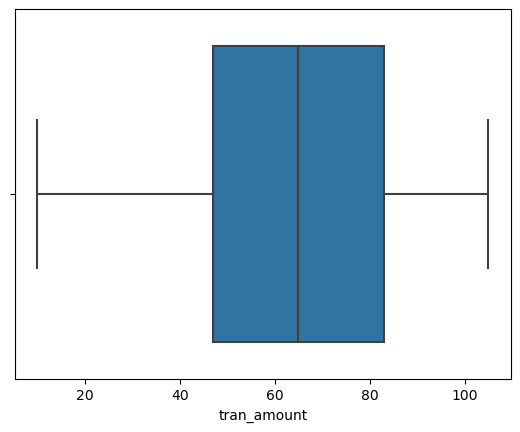

In [22]:
sns.boxplot(x=df['tran_amount'])
plt.show()

In [26]:
#create new column by using existing
df['Month']=df['trans_date'].dt.month
df

,customer_id,trans_date,tran_amount,response,Month
0,CS5295,2013-02-11,35,1,2
1,CS4768,2015-03-15,39,1,3
2,CS2122,2013-02-26,52,0,2
3,CS1217,2011-11-16,99,0,11
4,CS1850,2013-11-20,78,0,11
...,...,...,...,...,...
124995,CS8433,2011-06-26,64,0,6
124996,CS7232,2014-08-19,38,0,8
124997,CS8731,2014-11-28,42,0,11
124998,CS8133,2013-12-14,13,0,12


In [31]:
# 3 month have highest transaction amount
monthly_sales = df.groupby('Month')['tran_amount'].sum()

#sort the values in descending order
monthly_sales = monthly_sales.sort_values(ascending = False).reset_index().head(3)

monthly_sales

,Month,tran_amount
0,8,726921
1,10,725320
2,1,724107


In [35]:
#customers ahving highest number of orders

customer_counts= df['customer_id'].value_counts().reset_index()
customer_counts

,index,customer_id
0,CS4424,39
1,CS4320,38
2,CS3799,36
3,CS1215,35
4,CS5109,35
...,...,...
6884,CS8559,4
6885,CS7716,4
6886,CS8376,4
6887,CS7224,4


In [39]:
customer_counts.columns=['customer_id','Count']
customer_counts

,customer_id,Count
0,CS4424,39
1,CS4320,38
2,CS3799,36
3,CS1215,35
4,CS5109,35
...,...,...
6884,CS8559,4
6885,CS7716,4
6886,CS8376,4
6887,CS7224,4


In [43]:
# sort the values by highest number

top_customer = customer_counts.sort_values(by='Count',ascending=False).head(5)
top_customer

,customer_id,Count
0,CS4424,39
1,CS4320,38
2,CS3799,36
3,CS1215,35
4,CS5109,35


<Axes: xlabel='customer_id', ylabel='Count'>

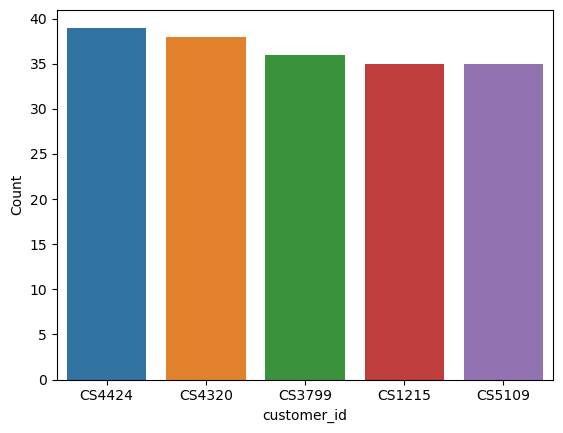

In [47]:
sns.barplot(x ='customer_id', y='Count',data=top_customer)

In [49]:
#Customers having highest value in sales

customer_sales = df.groupby('customer_id')['tran_amount'].sum().reset_index()
customer_sales

,customer_id,tran_amount
0,CS1112,1012
1,CS1113,1490
2,CS1114,1432
3,CS1115,1659
4,CS1116,857
...,...,...
6884,CS8996,582
6885,CS8997,543
6886,CS8998,624
6887,CS8999,383


In [52]:
#highest number of sales

top_sales = customer_sales.sort_values(by ='tran_amount',ascending=False).head(5)
top_sales

,customer_id,tran_amount
3312,CS4424,2933
3208,CS4320,2647
4640,CS5752,2612
3548,CS4660,2527
2687,CS3799,2513


<Axes: xlabel='customer_id', ylabel='tran_amount'>

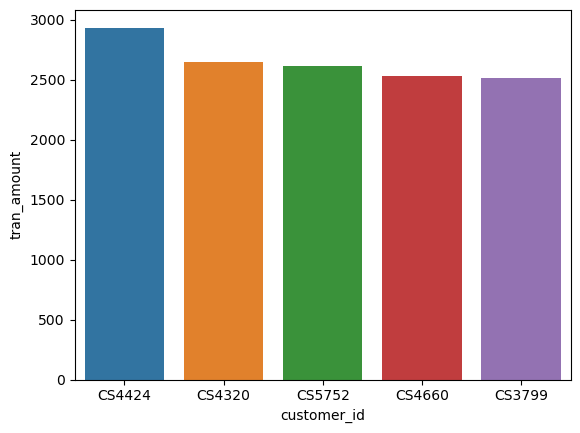

In [54]:
sns.barplot(x ='customer_id', y='tran_amount',data=top_sales)

# Time Series Analysis

In [73]:
import matplotlib.dates as mdates

In [62]:
df['month_year']= df['trans_date'].dt.to_period('M')
df['month_year']

0         2013-02
1         2015-03
2         2013-02
3         2011-11
4         2013-11
           ...   
124995    2011-06
124996    2014-08
124997    2014-11
124998    2013-12
124999    2014-12
Name: month_year, Length: 125000, dtype: period[M]

In [74]:
monthly_sales = df.groupby('month_year')['tran_amount'].sum()

monthly_sales= monthly_sales.index.to_timestamp()
plt.figure(figsize=(12,6))
plt.plot(monthly_sales.index,monthly_sales.values)

plt.gca().xaxix.set_major_formatter(mdates.Dateformatter('%y,%m'))
plt.gca().xaxix.set_major_locater(mdates.MonthLocator(interval =6))
plt.xlabel =('Month-year')
plt.ylabel =('Sales')
plt.Title =('Monthly Sales')
plt.xtrick(rotation=45)
plt.tight_layout()
plt.show()

AttributeError: 'DatetimeIndex' object has no attribute 'index'

<Figure size 1200x600 with 0 Axes>

# Churn Analysis

In [78]:
#count the number of churned and active customers

churn_counts =df['response'].value_counts()
churn_counts

 0                      111127
 1                       13842
-9223372036854775808        31
Name: response, dtype: int64

<Axes: >

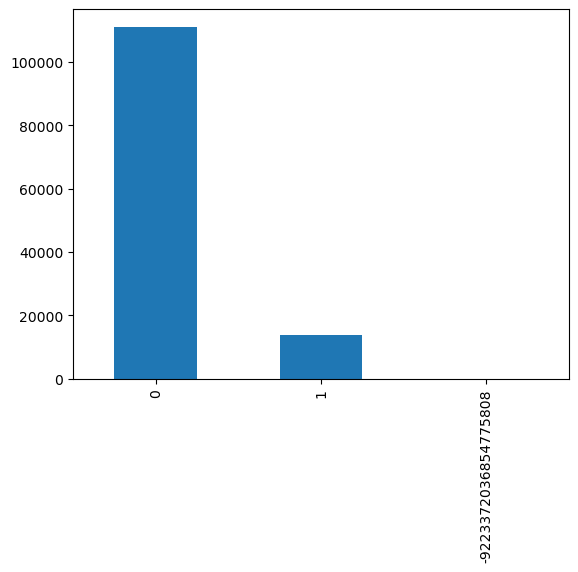

In [79]:
churn_counts.plot(kind='bar')